# # Clustering- Coastal Edges


In [1]:
import pandas as pd
import pandas_ml as pd_ml
import numpy as np
from numpy import linalg as LA

import scipy

%matplotlib notebook

import matplotlib.pylab as py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing

import itertools
from matplotlib.colors import ListedColormap
#import plotly.plotly as ply

import tensorflow as tf



C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
filename='NOAA2017_DEM-0000014848-0000000000_valid_combined.xyz'

d=pd.read_csv(filename, sep=' ')

colNames=['x', 'y','red','green','blue','nir']

d.columns=colNames 

d.to_hdf('Coastal.h5','table')



#df = pd.read_hdf('GoldenGate19withRGB.h5','table')

#df = pd.read_hdf('NJ_Sandy05.h5','table')
df = pd.read_hdf('Coastal.h5','table')


ndpoints=df.shape[0]

df.describe()

##print(df[1:1000])

,x,y,red,green,blue,nir
count,1.559241e+07,1.559241e+07,1.559241e+07,1.559241e+07,1.559241e+07,1.559241e+07
mean,3.869886e+05,4.795378e+06,8.719028e+01,1.142661e+02,1.349220e+02,2.134724e+01
std,6.635469e+02,2.139469e+03,5.407919e+01,4.078841e+01,2.623506e+01,2.971749e+01
min,3.856388e+05,4.791368e+06,2.000000e+00,4.500000e+01,7.200000e+01,1.000000e+00
25%,3.864288e+05,4.793580e+06,5.200000e+01,8.900000e+01,1.210000e+02,3.000000e+00
50%,3.870852e+05,4.795872e+06,6.300000e+01,1.030000e+02,1.280000e+02,7.000000e+00
75%,3.874528e+05,4.796879e+06,1.070000e+02,1.280000e+02,1.390000e+02,2.900000e+01
max,3.887862e+05,4.798792e+06,2.550000e+02,2.550000e+02,2.550000e+02,2.530000e+02


Note: Original data is mislabeled. We will perfom K-mean clustering with 4 classes.

In [3]:
adf=df[['x','y','red','green','blue', 'nir']]
adfmatrix=adf.as_matrix()

kmeans = KMeans(n_clusters=4, random_state=0).fit(adfmatrix)
kmeans.fit(adfmatrix)
y_kmeans = kmeans.predict(adfmatrix)







C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


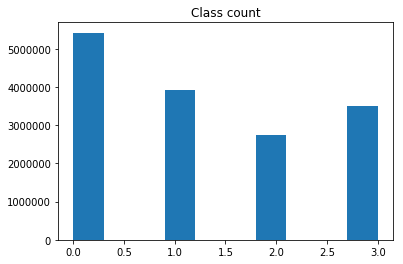

In [5]:
fig1=plt.figure(1)
plt.hist(y_kmeans)
plt.title('Class count')
plt.show()

In [6]:
print(y_kmeans.size)
print(type(y_kmeans))
unique,count=np.unique(y_kmeans,return_counts=True)
print(unique,count)




15592413
<class 'numpy.ndarray'>
[0 1 2 3] [5423183 3935352 2735887 3497991]


In [7]:
ndpoints=df.shape[0]
nsubset=100000
k=10  ## k nearest neighbors
grid=np.floor(ndpoints/nsubset).astype(int)
###
edf=df.iloc[0:ndpoints:grid]
cdf=df[['x','y']]
ecdf=cdf.iloc[0:ndpoints:grid]
sd=scipy.spatial.cKDTree(ecdf)
nn=sd.query(ecdf.iloc[1:ndpoints:grid], k)
adf=df[['x','y','red','green','blue','nir']]

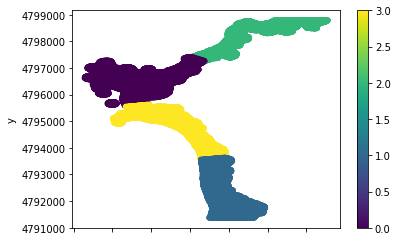

In [8]:
#fig=plt.figure()
#ax = Axes3D(fig)
#ax.scatter(xs=adfmatrix[:, 0], ys=adfmatrix[:, 1], c=y_kmeans, s=1,cmap='viridis')
#plt.scatter()
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

###
sub_adf= adf[::grid]
###



#ax2 = adf.plot.scatter(x='x', y='y', c=y_kmeans, colormap='viridis')
ax2 = sub_adf.plot.scatter(x='x', y='y', c=y_kmeans[::grid], colormap='viridis')                       

####

